In [2]:
import numpy as np
from numpy.fft import fft
import pandas as pd
import matplotlib.pyplot as plt
import zlib 
import scipy as sp
import sys

In [3]:
import pandas as pd

df = pd.read_csv('csv/Turntable1.csv')

In [4]:
t = df[['Time']].to_numpy()
accX = df[['Accel X (g)']].to_numpy()
temp = df[['Temp']].to_numpy()
gyroZ = df[['Gyro Z (dps)']].to_numpy()
gravY = df[['Grav Y']].to_numpy()

In [5]:
t = df[['Time']][:1000].to_numpy()
accX = df[['Accel X (g)']][:1000].to_numpy()
temp = df[['Temp']][:1000].to_numpy()

Text(0.5, 1.0, 'Plot of AccX vs Time (First 1000 Entries)')

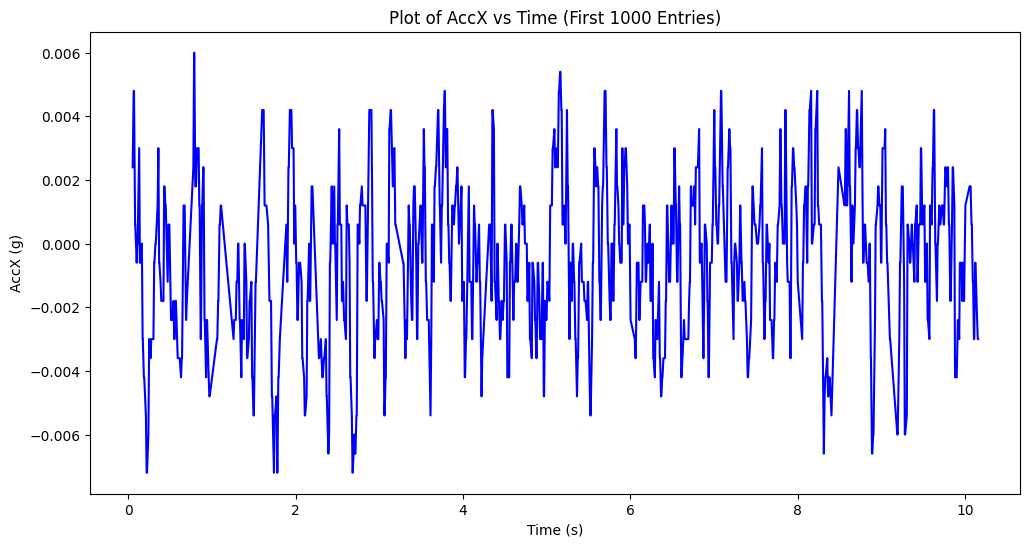

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(t, accX, 'b')
plt.ylabel('AccX (g)')
plt.xlabel("Time (s)")
plt.title("Plot of AccX vs Time (First 1000 Entries)")

Text(0.5, 1.0, 'FFT of AccX')

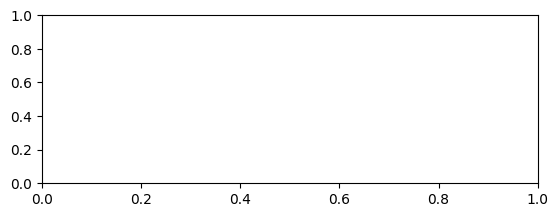

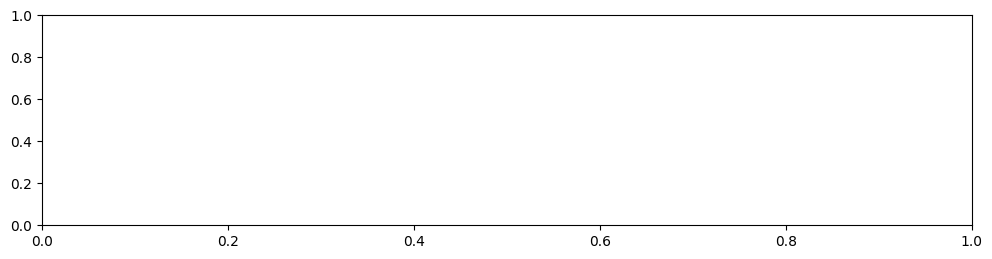

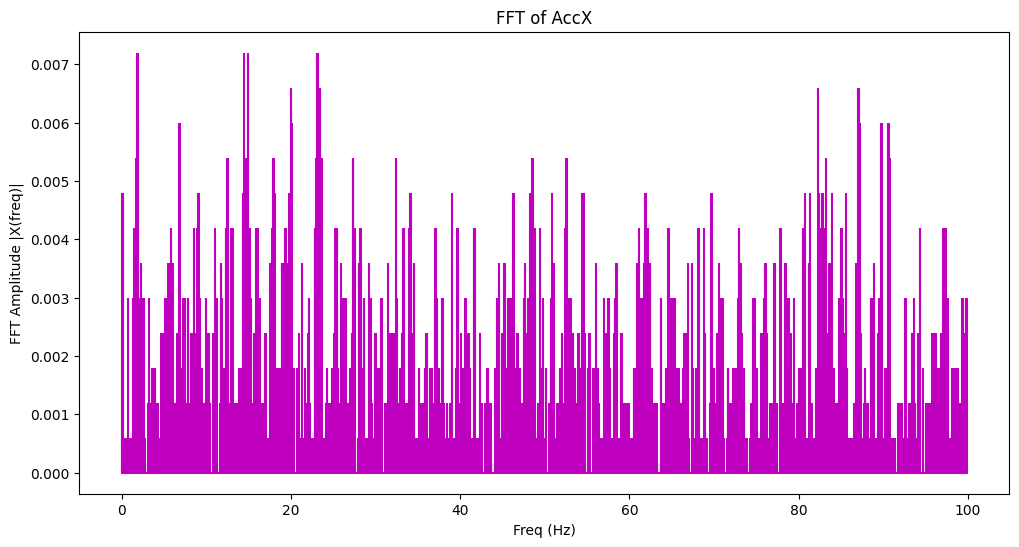

In [10]:
plt.subplot(211)
plt.figure(figsize = (12, 6))
plt.plot(t, accX, 'b')
plt.ylabel('AccX (g)')
plt.xlabel("Time (s)")
plt.title("Plot of AccX vs Time (First 1000 Entries)")
sr =100
X = fft(accX)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
plt.subplot(212)

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'm', \
         markerfmt=" ", basefmt="-m")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of AccX')
#plt.plot()

[]

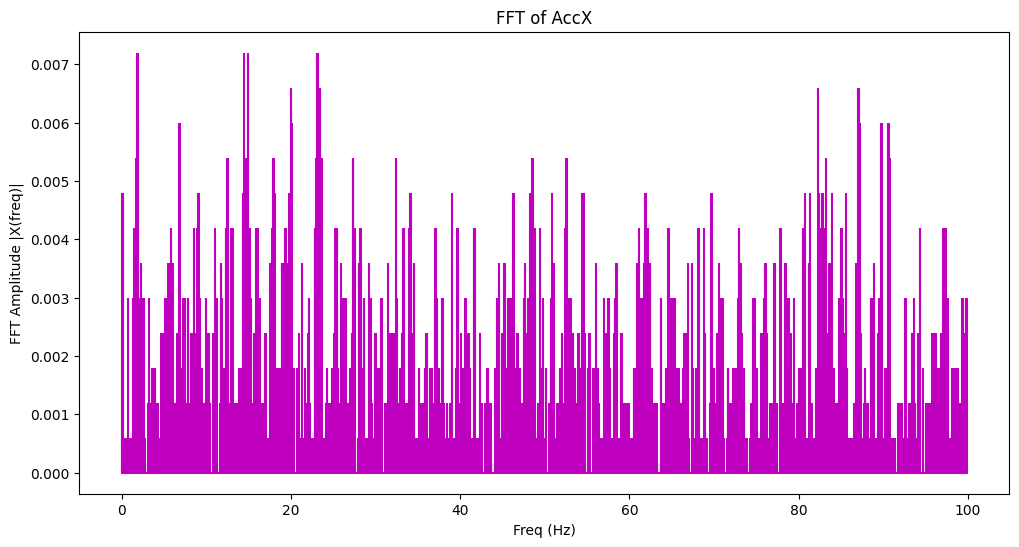

In [90]:
sr =100
X = fft(accX)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'm', \
         markerfmt=" ", basefmt="-m")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT of AccX')
plt.plot()



Text(0.5, 1.0, 'Plot of AccX vs Time (First 1000 Entries')

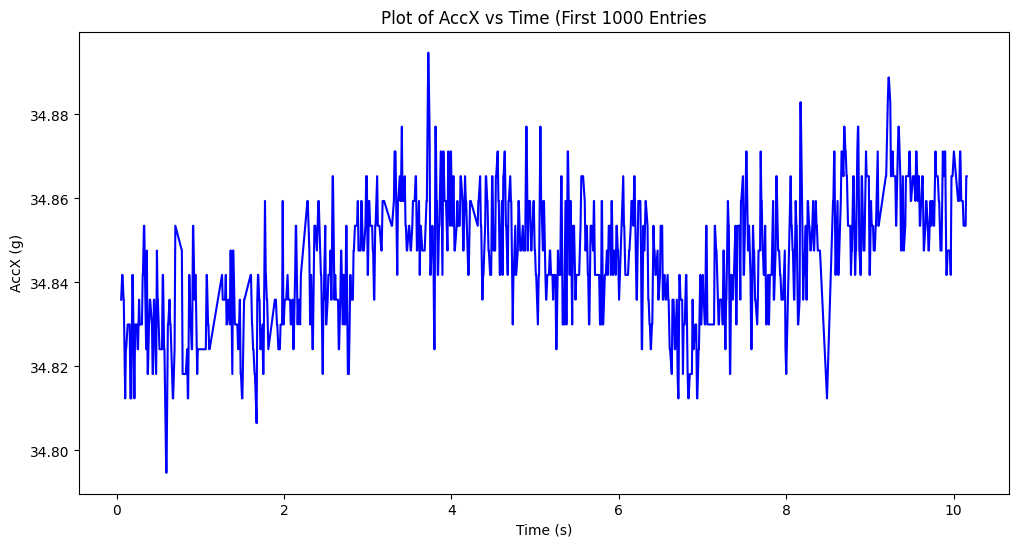

In [81]:
plt.figure(figsize = (12, 6))
plt.plot(t, temp, 'b')
plt.ylabel('AccX (g)')
plt.xlabel("Time (s)")
plt.title("Plot of AccX vs Time (First 1000 Entries")

[]

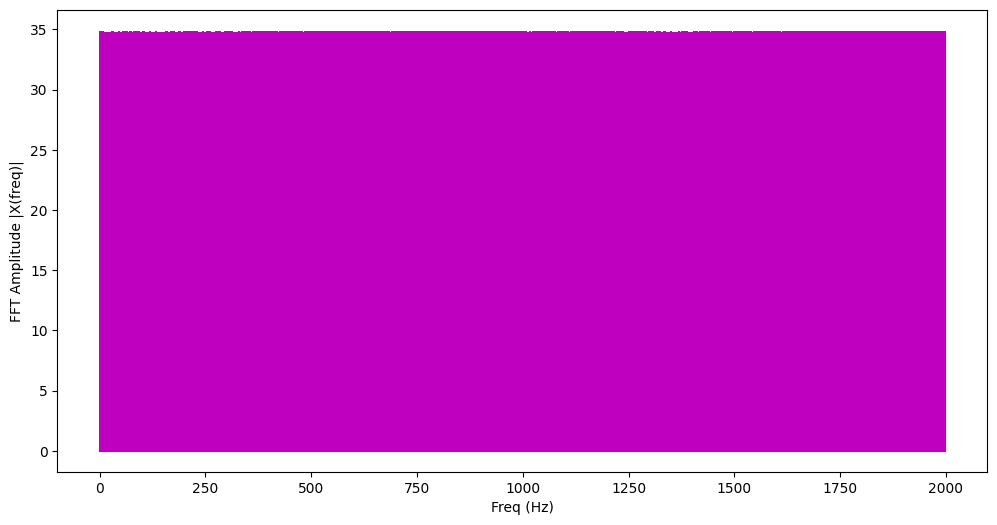

In [82]:
sr =2000
X = fft(temp)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'm', \
         markerfmt=" ", basefmt="-m")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.plot()

MemoryError: Unable to allocate 42.5 GiB for an array with shape (53397, 53397) and data type complex128

In [11]:
x = df[:150]
x = x.to_string()


In [12]:
with open('Turntable150.txt', 'w') as f:
    f.write(x)

In [4]:
with open('accX.txt', 'w') as f:
    f.writelines(accX)

In [5]:
import zlib
import time 

def compress(plaintext, level):
    comp = zlib.compress(plaintext.encode('utf-8'), level)
    return comp

def decompress(comp):
    decomp = zlib.decompress(comp)
    return decomp

In [1]:
import sys

In [9]:
with open('csv_as_text/Turntable1.txt') as f:
    data = f.readlines()


## Compression

In [6]:
def compress(plaintext, level):
    comp = zlib.compress(plaintext.encode('utf-8'), level)
    return comp

In [7]:
with open('csv_as_text/WalkingAround.txt') as f:
    original = f.readlines()


In [23]:
data = "hi"

In [24]:
comp = compress(data, 8)

with open('SerialData/comp_sample.txt', 'w') as f:
    f.write(str(comp))

In [5]:
compressed = []
for line in original:
    comp = compress(line, 8)
    compressed.append(comp)

In [6]:
with open('compressed/WalkingAround_compressed.txt', 'wb') as f:
    f.writelines(compressed)

In [7]:
decompressed = []
for line in compressed:
    decomp = zlib.decompress(line)
    decompressed.append(decomp)

In [8]:
with open('decompressed/WalkingAround_decompressed.txt', 'wb') as f:
    f.writelines(decompressed)

In [9]:
with open('csv_as_text/WalkingAround.txt') as f:
    original_file = f.read()

with open('decompressed/WalkingAround_decompressed.txt') as f:
    decompressed_file = f.read()

In [10]:
if original_file==decompressed_file:
    print('All data retained after compression and decompression')
else:
    print('Insufficient data retained after compression and decompression')

All data retained after compression and decompression


## Encryption

In [207]:
from Crypto.Cipher import AES
from secrets import token_bytes
import time

#generate key
key = token_bytes(16)

#encrypt function
def encrypt(msg):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(msg.encode('ascii'))
    return nonce, ciphertext, tag

#decrypt function
def decrypt(nonce, ciphertext, tag):
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    try:
        cipher.verify(tag)
        return plaintext.decode('ascii')
    except:
        return False

#function to check if decrypted data is the same as the original data
def check_decryption(plaintext, original):
    if plaintext == original:
        print('Decryption Successful')
    else:
        print('Decryption Failed')

#timing function
def get_time():
    t = time.perf_counter()
    return t

def do_encryption(filenames, timing=False, generate_files=False):
    for file in filenames:
        #read text file as a string
        with open('csv_as_text/'+file) as f:
            original = f.read()
    
        start = get_time()
        #encrypt data
        nonce, ciphertext, tag = encrypt(original)
        stop = get_time()
        encrypt_time = round(stop-start, 4) 
        
        start = get_time()
        #decrypt data
        plaintext = decrypt(nonce, ciphertext, tag)
        stop = get_time()
        decrypt_time = round(stop-start, 4)

        total_time = encrypt_time+decrypt_time

        #generate textfiles
        if generate_files:
            with open('encrypted/encrypted_'+file+'.txt', 'w') as f:
                f.writelines(str(ciphertext))

            start = get_time()
            with open('decrypted/decrypted_'+file+'.txt', 'w') as f:
                f.writelines(str(plaintext))
            stop = get_time()
            write_time = round(stop-start, 4)
            total_time += write_time

        print(f'Checking Decryption for {file}')
        check_decryption(plaintext, original)

        if timing:
            print(f'Encrption Execution Time {encrypt_time} seconds')
            print(f'Decryption Execution Time {decrypt_time} seconds')
            if generate_files:
                print(f'Time to write to text file {write_time} seconds')
            print(f'Total Execution Time {total_time} seconds')

        print('-------------------------------------')